# Music recomendation system

## Installing libreriess 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
# import pyspark.pandas as ps


## Loading the data

In [7]:
df = pd.read_csv('/home/astin/Documents/MypythonBriefcase/ml/practice/system_recomendation/data/Spotify_Youtube.csv')

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20716 entries, 0 to 20717
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Artist            20716 non-null  object 
 1   Track             20716 non-null  object 
 2   Album             20716 non-null  object 
 3   Album_type        20716 non-null  object 
 4   Danceability      20716 non-null  float64
 5   Energy            20716 non-null  float64
 6   Key               20716 non-null  float64
 7   Loudness          20716 non-null  float64
 8   Speechiness       20716 non-null  float64
 9   Acousticness      20716 non-null  float64
 10  Instrumentalness  20716 non-null  float64
 11  Liveness          20716 non-null  float64
 12  Valence           20716 non-null  float64
 13  Tempo             20716 non-null  float64
 14  Duration_ms       20716 non-null  float64
 15  Views             20716 non-null  float64
 16  Likes             20716 non-null  float64
 17

## Transform

In [26]:
df.drop(['Unnamed: 0','Url_spotify','Uri','Url_youtube','Title','Channel','Description','Licensed','official_video'], axis=1,inplace=True)


In [27]:
df.head()

Artist                                          Track  \
0  Gorillaz                                 Feel Good Inc.   
1  Gorillaz                                Rhinestone Eyes   
2  Gorillaz  New Gold (feat. Tame Impala and Bootie Brown)   
3  Gorillaz                             On Melancholy Hill   
4  Gorillaz                                 Clint Eastwood   

                                           Album Album_type  Danceability  \
0                                     Demon Days      album         0.818   
1                                  Plastic Beach      album         0.676   
2  New Gold (feat. Tame Impala and Bootie Brown)     single         0.695   
3                                  Plastic Beach      album         0.689   
4                                       Gorillaz      album         0.663   

   Energy   Key  Loudness  Speechiness  Acousticness  Instrumentalness  \
0   0.705   6.0    -6.679       0.1770      0.008360          0.002330   
1   0.703   8.0    -5.815       0.0302      0.086900          0.000687   
2   0.923   1.0    -3.930       0.0522      0.042500          0.046900   
3   0.739   2.0    -5.810       0.0260      0.000015          0.509000   
4   0.694  10.0    -8.627       0.1710      0.025300          0.000000   

   Liveness  Valence    Tempo  Duration_ms        Views      Likes  Comments  \
0    0.6130    0.772  138.559     222640.0  693555221.0  6220896.0  169907.0   
1    0.0463    0.852   92.761     200173.0   72011645.0  1079128.0   31003.0   
2    0.1160    0.551  108.014     215150.0    8435055.0   282142.0    7399.0   
3    0.0640    0.578  120.423     233867.0  211754952.0  1788577.0   55229.0   
4    0.0698    0.525  167.953     340920.0  618480958.0  6197318.0  155930.0   

         Stream  
0  1.040235e+09  
1  3.100837e+08  
2  6.306347e+07  
3  4.346636e+08  
4  6.172597e+08

In [37]:
df.isna().sum()

Artist              0
Track               0
Album               0
Album_type          0
Danceability        0
Energy              0
Key                 0
Loudness            0
Speechiness         0
Acousticness        0
Instrumentalness    0
Liveness            0
Valence             0
Tempo               0
Duration_ms         0
Views               0
Likes               0
Comments            0
Stream              0
dtype: int64

In [34]:
df['Views'].fillna(0, inplace=True)
df['Likes'].fillna(0, inplace=True)
df['Comments'].fillna(0, inplace=True)
df['Stream'].fillna(0, inplace=True)

In [36]:
df.dropna(inplace=True)

In [39]:
df.isna().sum()

Artist              0
Track               0
Album               0
Album_type          0
Danceability        0
Energy              0
Key                 0
Loudness            0
Speechiness         0
Acousticness        0
Instrumentalness    0
Liveness            0
Valence             0
Tempo               0
Duration_ms         0
Views               0
Likes               0
Comments            0
Stream              0
dtype: int64

## EDA

In [40]:
df.describe()

Danceability        Energy           Key      Loudness   Speechiness  \
count  20716.000000  20716.000000  20716.000000  20716.000000  20716.000000   
mean       0.619777      0.635250      5.300348     -7.671680      0.096456   
std        0.165272      0.214147      3.576449      4.632749      0.111960   
min        0.000000      0.000020      0.000000    -46.251000      0.000000   
25%        0.518000      0.507000      2.000000     -8.858000      0.035700   
50%        0.637000      0.666000      5.000000     -6.536000      0.050500   
75%        0.740250      0.798000      8.000000     -4.931000      0.103000   
max        0.975000      1.000000     11.000000      0.920000      0.964000   

       Acousticness  Instrumentalness      Liveness       Valence  \
count  20716.000000      20716.000000  20716.000000  20716.000000   
mean       0.291535          0.055962      0.193521      0.529853   
std        0.286299          0.193262      0.168531      0.245441   
min        0.000001          0.000000      0.014500      0.000000   
25%        0.045200          0.000000      0.094100      0.339000   
50%        0.193000          0.000002      0.125000      0.537000   
75%        0.477250          0.000463      0.237000      0.726250   
max        0.996000          1.000000      1.000000      0.993000   

              Tempo   Duration_ms         Views         Likes      Comments  \
count  20716.000000  2.071600e+04  2.071600e+04  2.071600e+04  2.071600e+04   
mean     120.638340  2.247176e+05  9.181460e+07  6.460739e+05  2.676542e+04   
std       29.579018  1.247905e+05  2.718831e+08  1.769049e+06  1.906247e+05   
min        0.000000  3.098500e+04  0.000000e+00  0.000000e+00  0.000000e+00   
25%       97.002000  1.800095e+05  1.484132e+06  1.759200e+04  4.087500e+02   
50%      119.965000  2.132845e+05  1.337390e+07  1.151360e+05  3.008000e+03   
75%      139.935000  2.524430e+05  6.750037e+07  4.997322e+05  1.373025e+04   
max      243.372000  4.676058e+06  8.079649e+09  5.078865e+07  1.608314e+07   

             Stream  
count  2.071600e+04  
mean   1.321632e+08  
std    2.417613e+08  
min    0.000000e+00  
25%    1.558848e+07  
50%    4.717350e+07  
75%    1.337773e+08  
max    3.386520e+09

In [41]:
df.columns

Index(['Artist', 'Track', 'Album', 'Album_type', 'Danceability', 'Energy',
       'Key', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness',
       'Liveness', 'Valence', 'Tempo', 'Duration_ms', 'Views', 'Likes',
       'Comments', 'Stream'],
      dtype='object')

## Viz

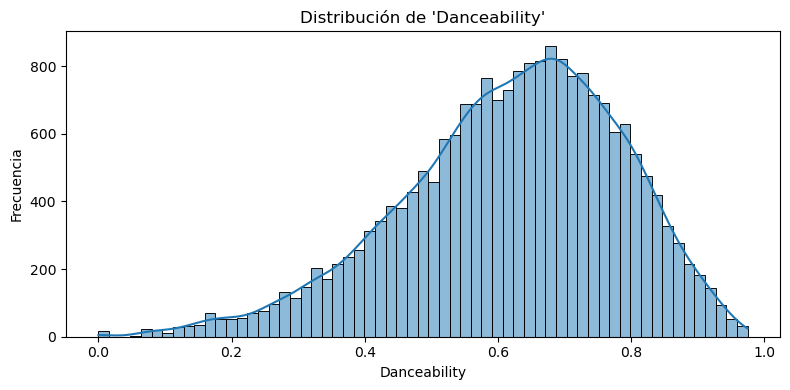

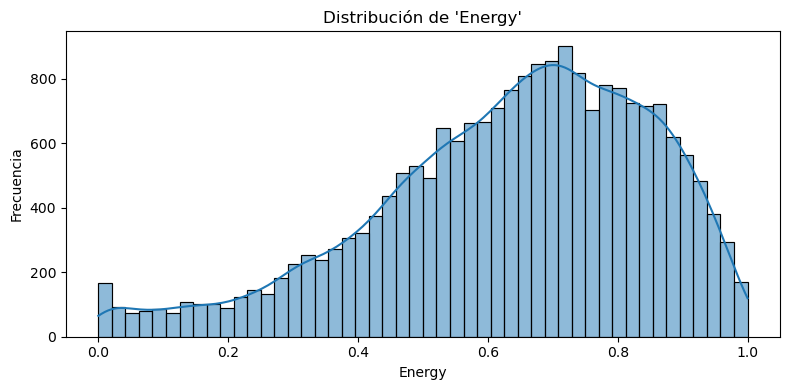

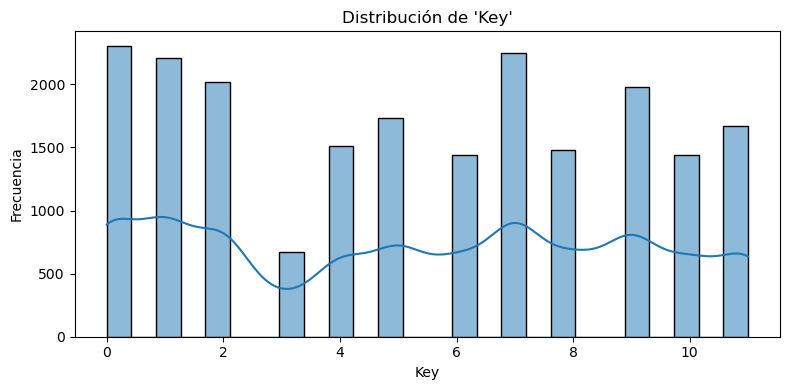

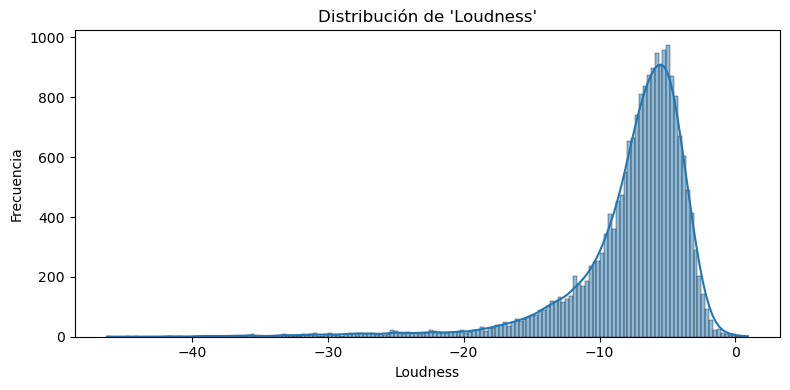

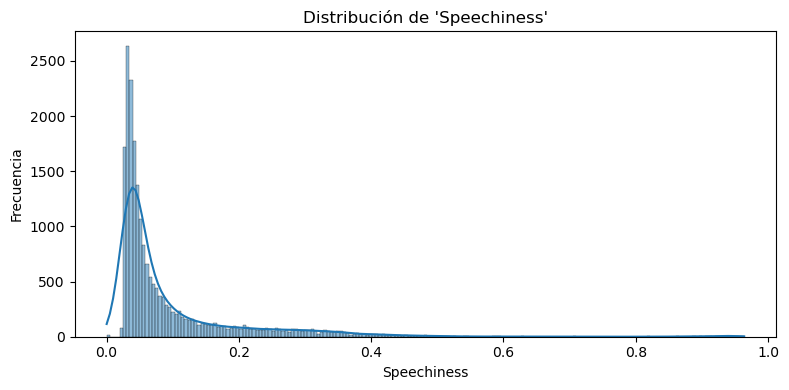

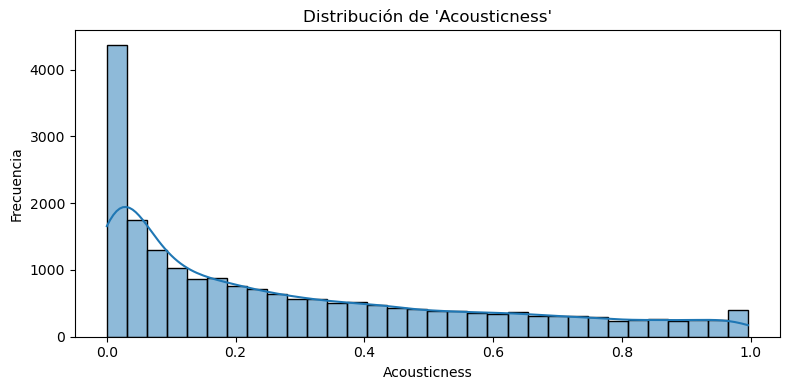

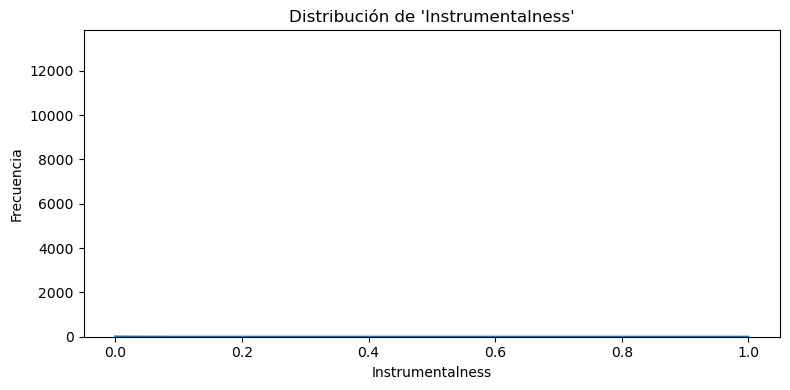

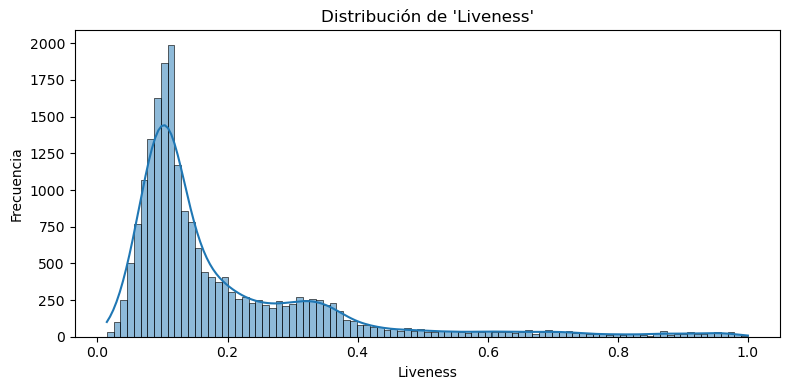

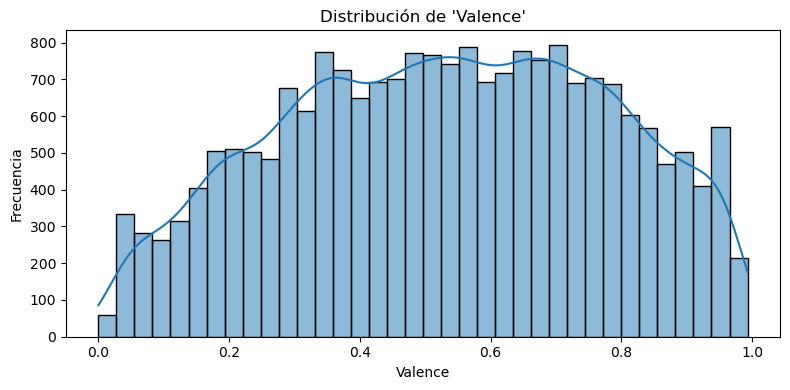

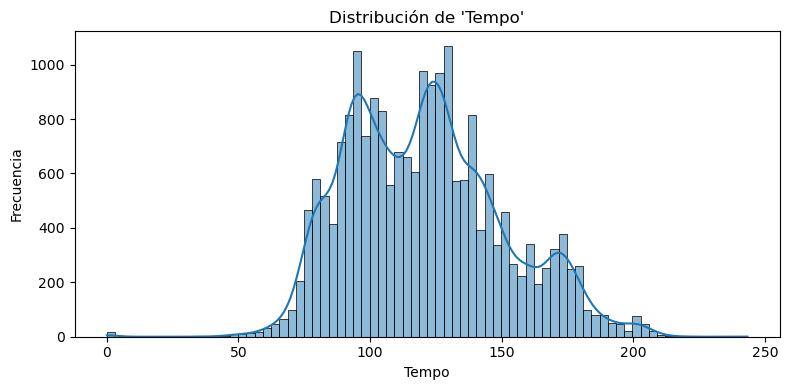

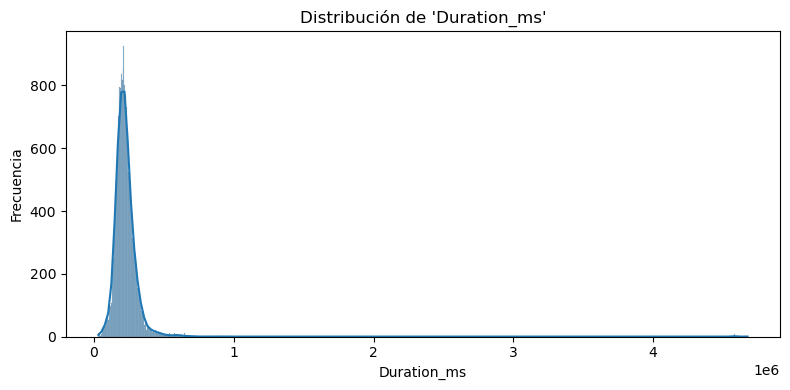

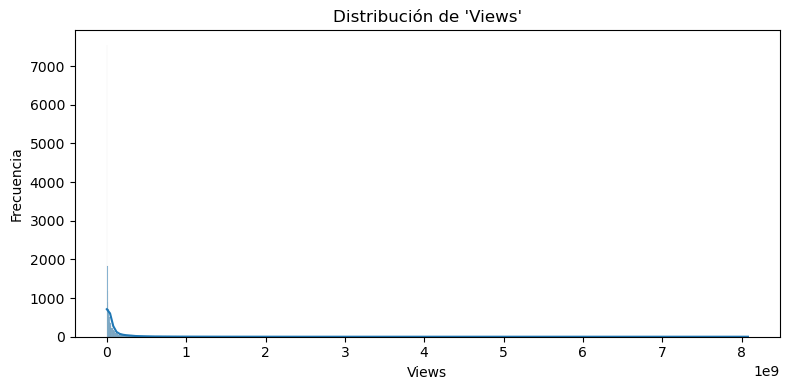

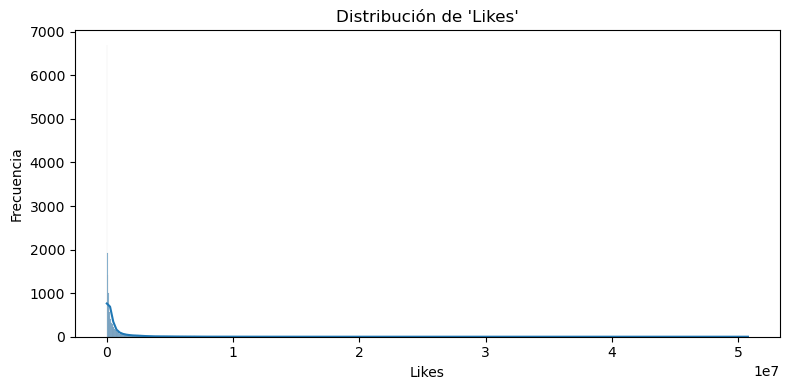

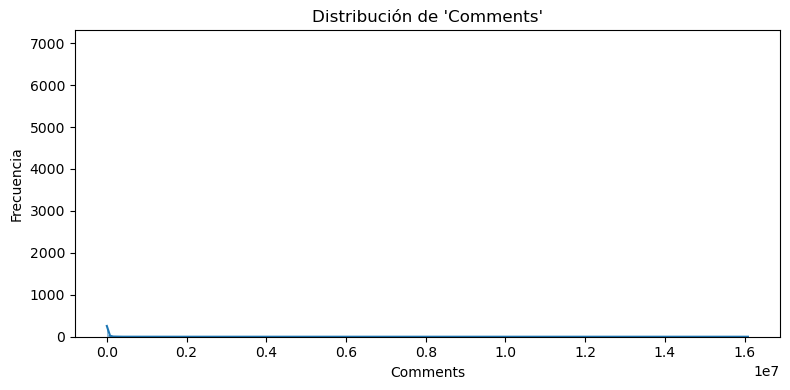

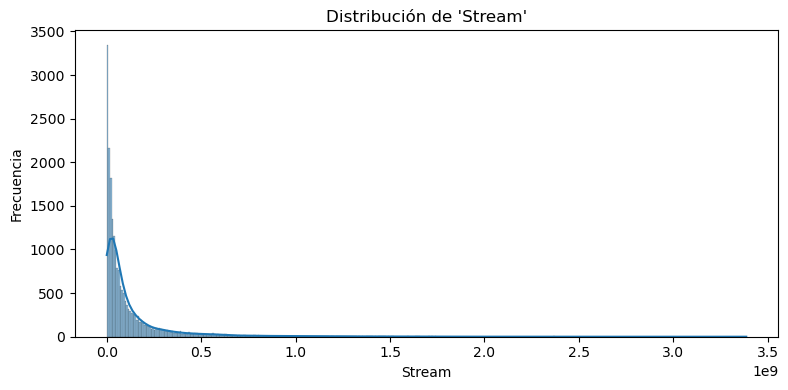

In [42]:
num_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
for col in num_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f"Distribución de '{col}'")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.tight_layout()
    plt.show()


<Axes: xlabel='Album_type', ylabel='percent'>

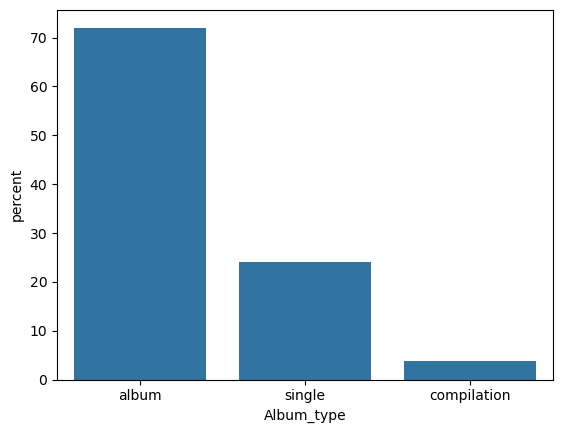

In [62]:
sns.countplot(
    data=df, 
    x='Album_type',
    stat="percent")

In [66]:
# Group the songs by artist and views - youtube, stream - spotify
artist_grouped = df.groupby('Artist')[['Views', 'Stream']].sum()

# Sort the artists by the sum of views and streams in descending order
artist_sorted = artist_grouped.sort_values(['Views', 'Stream'], ascending=False)

# Get the top 10 artists with the most number of views on YouTube and streams on Spotify
top_10 = artist_sorted.head(10)

top_10

Views        Stream
Artist                                             
Ed Sheeran               1.546021e+10  1.439488e+10
CoComelon                1.460167e+10  3.690822e+08
Katy Perry               1.312063e+10  6.607329e+09
Charlie Puth             1.216759e+10  7.041187e+09
Luis Fonsi               1.162811e+10  5.054326e+09
Justin Bieber            1.099106e+10  1.209777e+10
Daddy Yankee             1.087193e+10  5.135462e+09
Bruno Mars               1.024092e+10  1.089786e+10
Macklemore & Ryan Lewis  1.012206e+10  3.982978e+09
Coldplay                 9.997278e+09  1.177848e+10

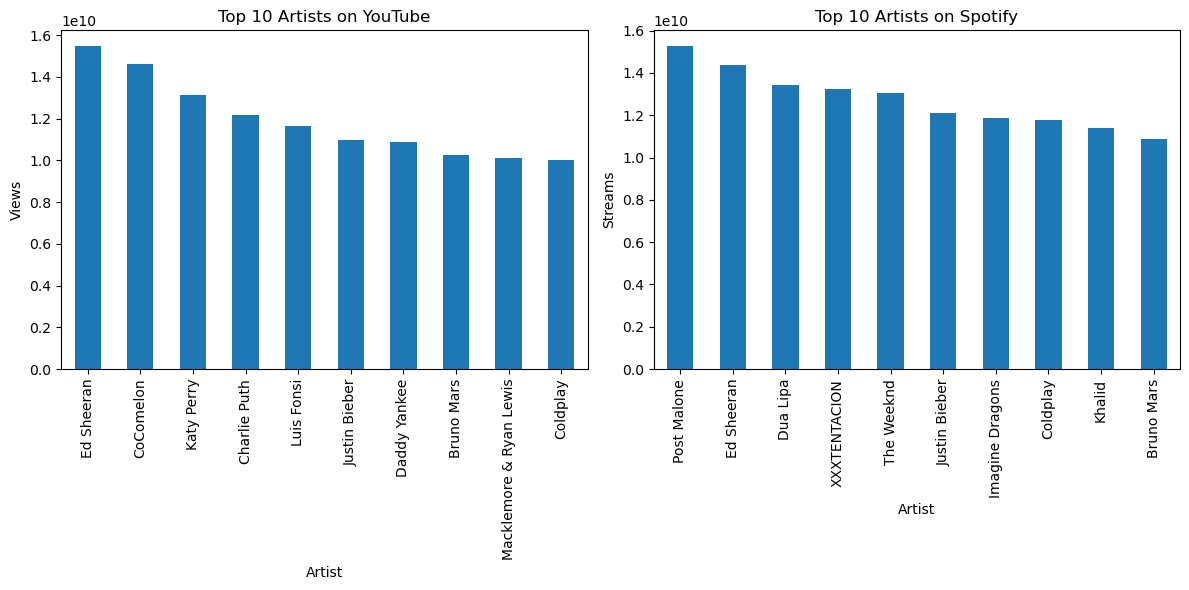

In [67]:
# Create two separate DataFrames for views and streams
df_views = df.groupby('Artist')['Views'].sum().sort_values(ascending=False)[:10]
df_streams = df.groupby('Artist')['Stream'].sum().sort_values(ascending=False)[:10]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))

# top 10 yt
ax1.set_title('Top 10 Artists on YouTube')
df_views.plot(kind='bar', ax=ax1)

# top 10 spotofy
ax2.set_title('Top 10 Artists on Spotify')
df_streams.plot(kind='bar', ax=ax2)


ax1.set_xlabel('Artist')
ax1.set_ylabel('Views')
ax2.set_xlabel('Artist')
ax2.set_ylabel('Streams')
fig.tight_layout()
plt.show()

In [68]:
top_songs = df.sort_values('Stream', ascending=False).head(10)
top_songs[['Track', 'Energy', 'Danceability', 'Acousticness']]

Track  Energy  Danceability  \
15250                                Blinding Lights   0.730         0.514   
12452                                   Shape of You   0.652         0.825   
19186                              Someone You Loved   0.405         0.501   
17937                     rockstar (feat. 21 Savage)   0.520         0.585   
17445  Sunflower - Spider-Man: Into the Spider-Verse   0.522         0.755   
17938  Sunflower - Spider-Man: Into the Spider-Verse   0.522         0.755   
13503                                      One Dance   0.625         0.792   
16028                                         Closer   0.524         0.748   
16099                                         Closer   0.524         0.748   
14030                                       Believer   0.780         0.776   

       Acousticness  
15250       0.00146  
12452       0.58100  
19186       0.75100  
17937       0.12400  
17445       0.53300  
17938       0.53300  
13503       0.00776  
16028       0.41400  
16099       0.41400  
14030       0.06220

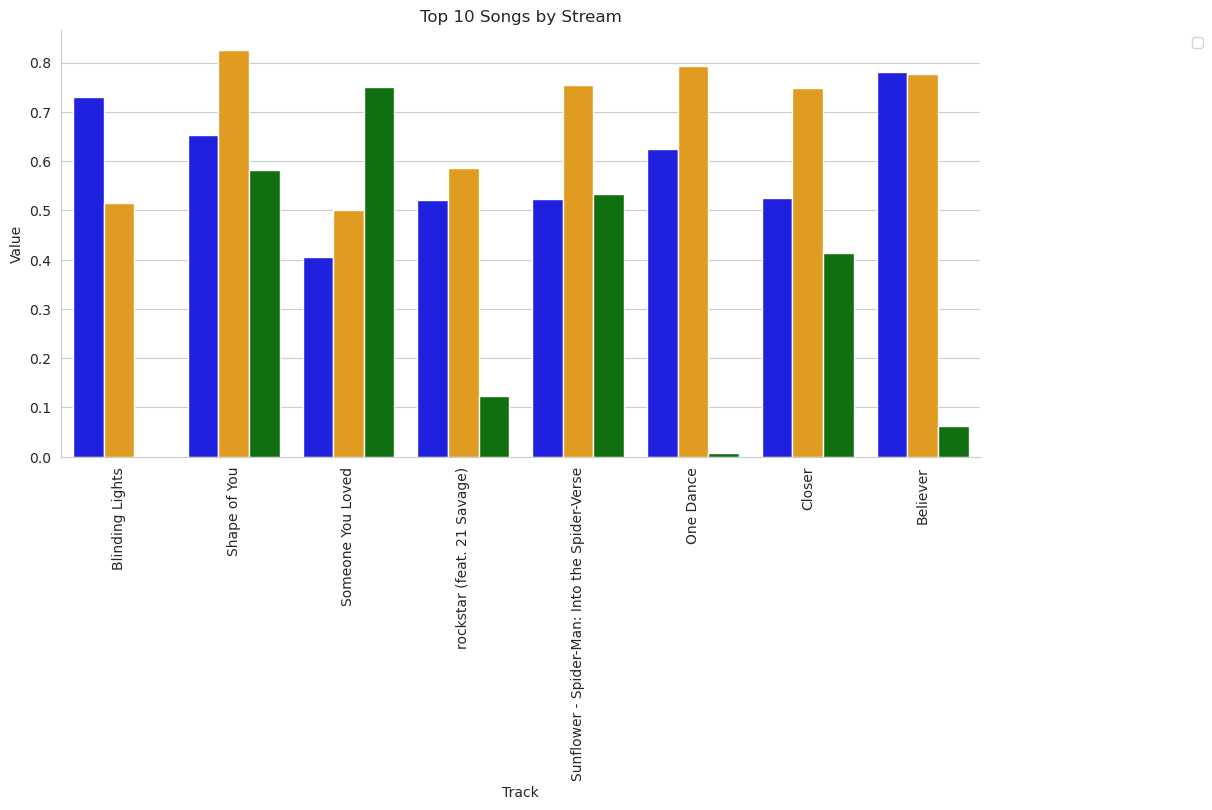

In [69]:
top_songs_melt = top_songs.melt(id_vars=['Track'], value_vars=['Energy', 'Danceability', 'Acousticness'],
                                var_name='Attribute', value_name='Value')

sns.set_style('whitegrid')
sns.catplot(x='Track', y='Value', hue='Attribute', data=top_songs_melt, kind='bar',
            palette={'Energy': 'blue', 'Danceability': 'orange', 'Acousticness': 'green'},
            aspect=2, legend=False)


plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
plt.title('Top 10 Songs by Stream')
plt.xlabel('Track')
plt.ylabel('Value')

plt.xticks(rotation=90)
plt.show()

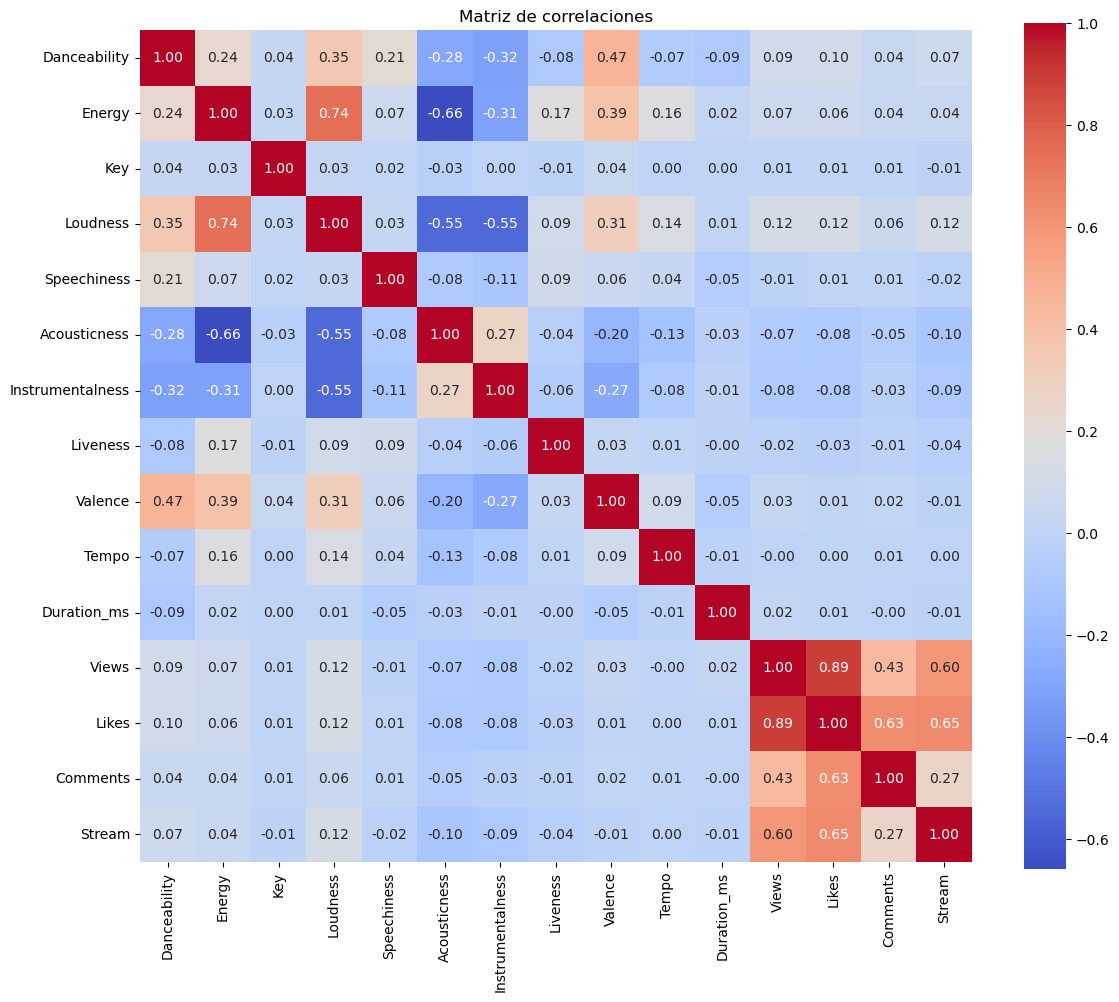

In [ ]:
if len(num_cols) > 1:
    plt.figure(figsize=(12,10))
    corr = df[num_cols].corr()
    sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
    plt.title("Matriz de correlaciones")
    plt.tight_layout()
    plt.show()

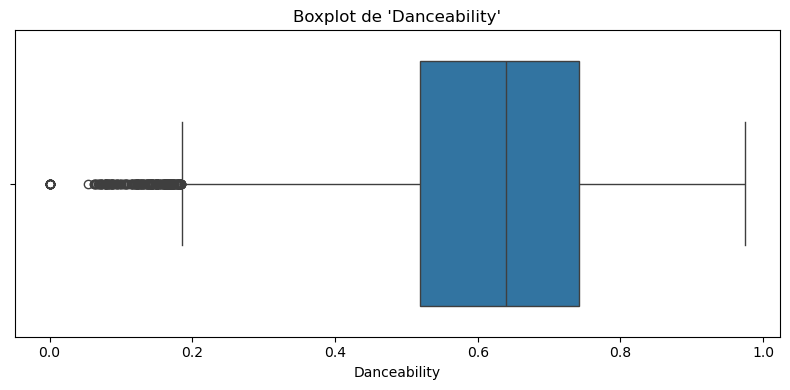

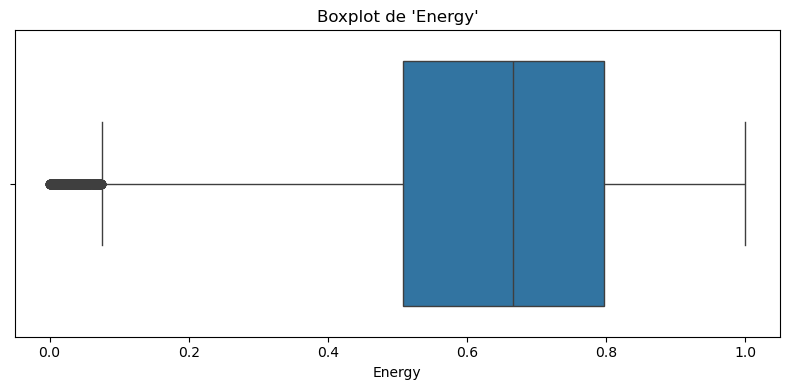

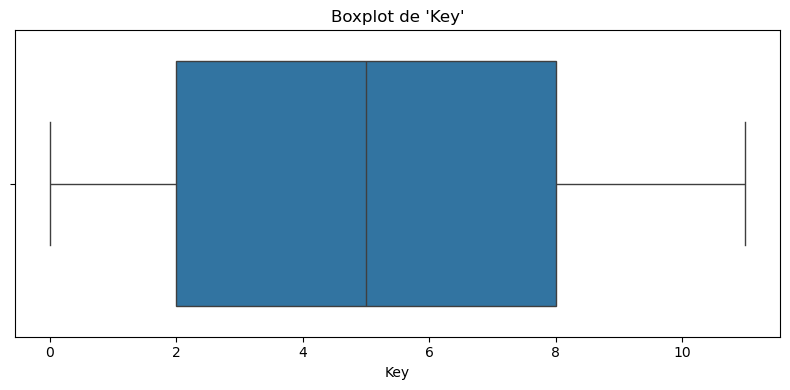

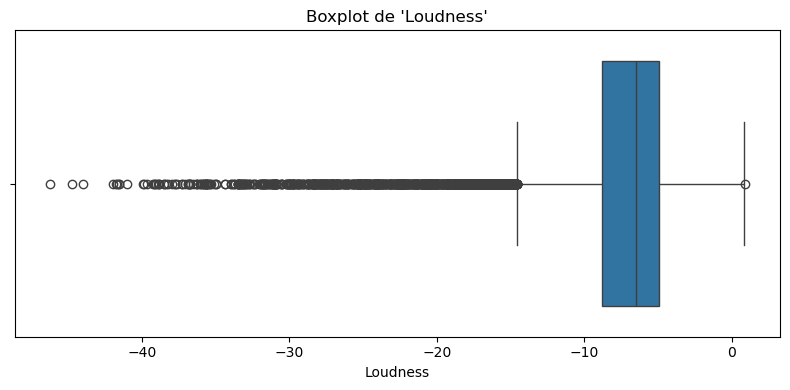

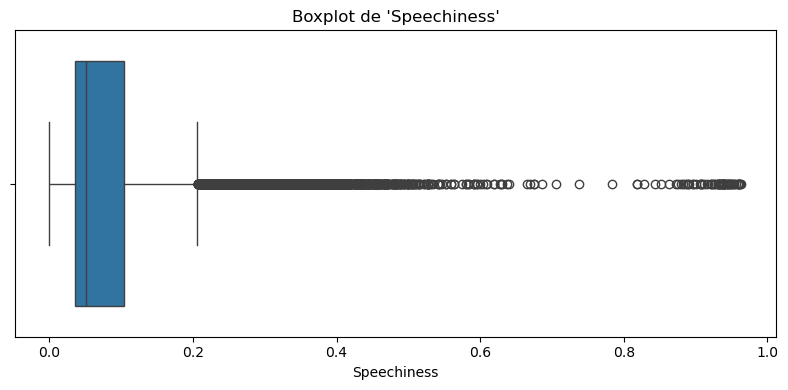

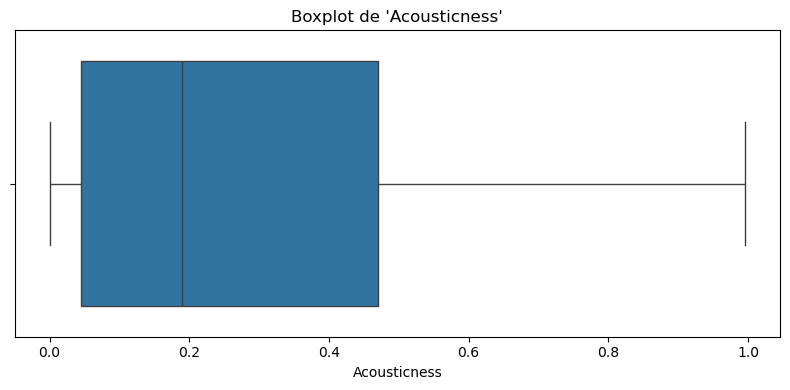

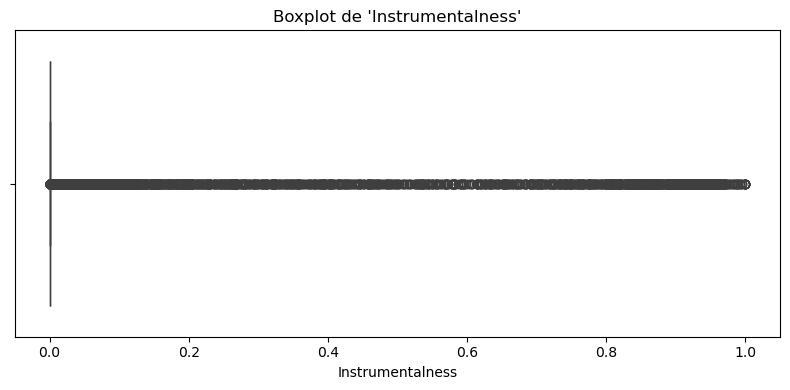

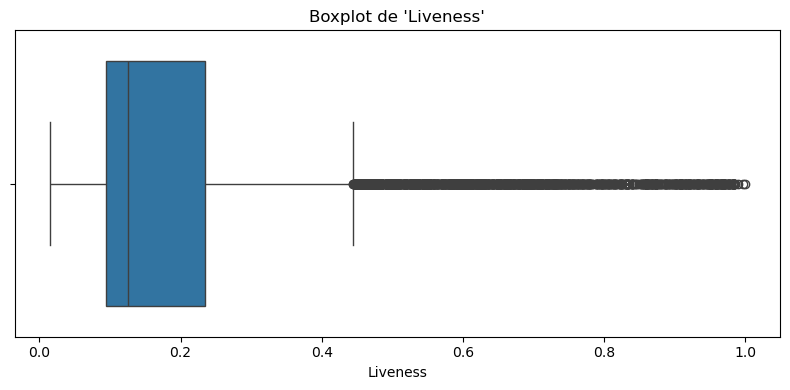

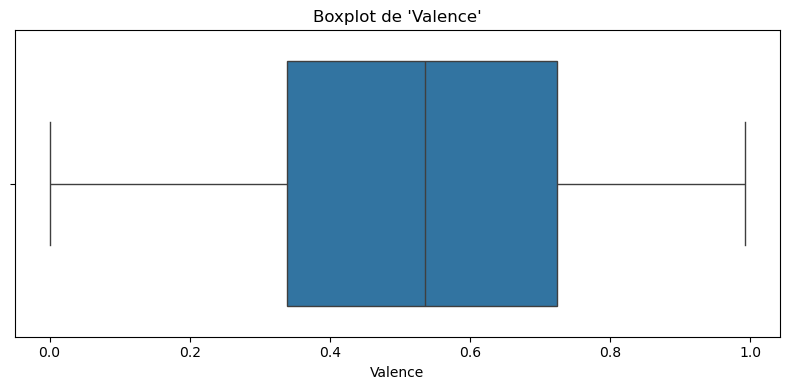

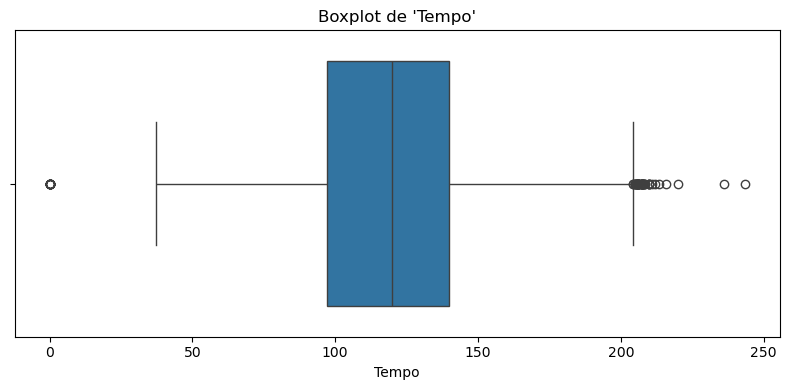

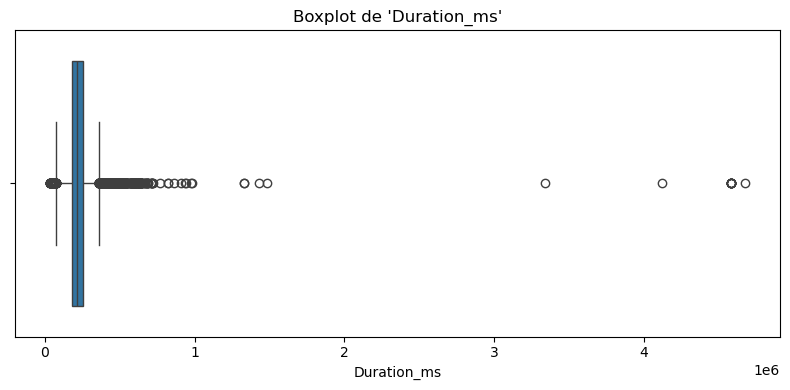

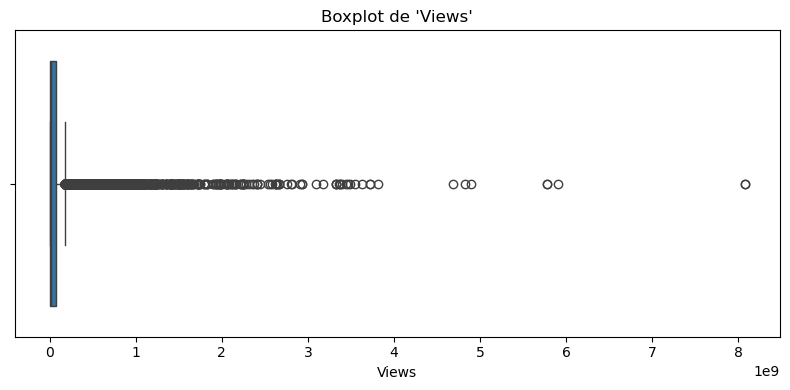

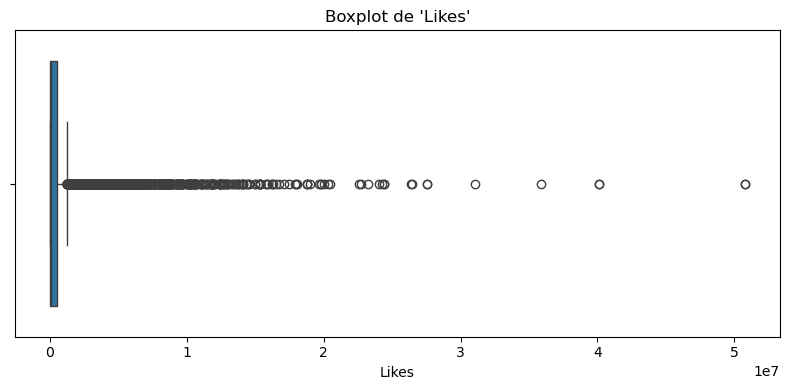

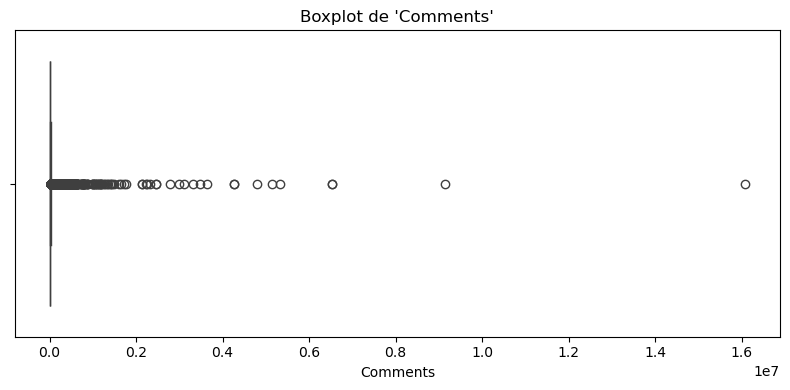

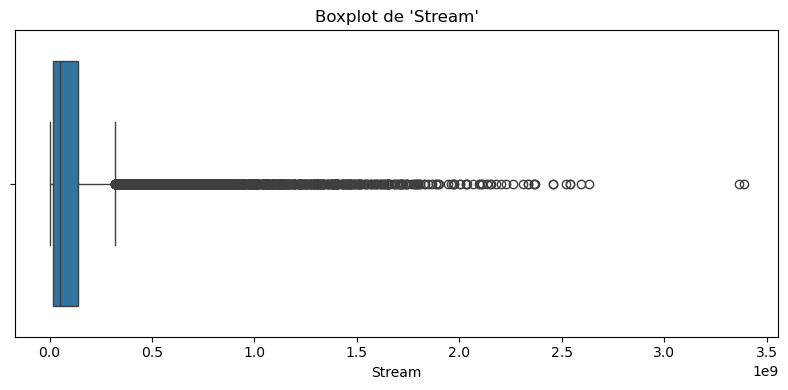

In [60]:
# 7. Boxplots de variables numéricas (detección de outliers)
for col in num_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df[col].dropna())
    plt.title(f"Boxplot de '{col}'")
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

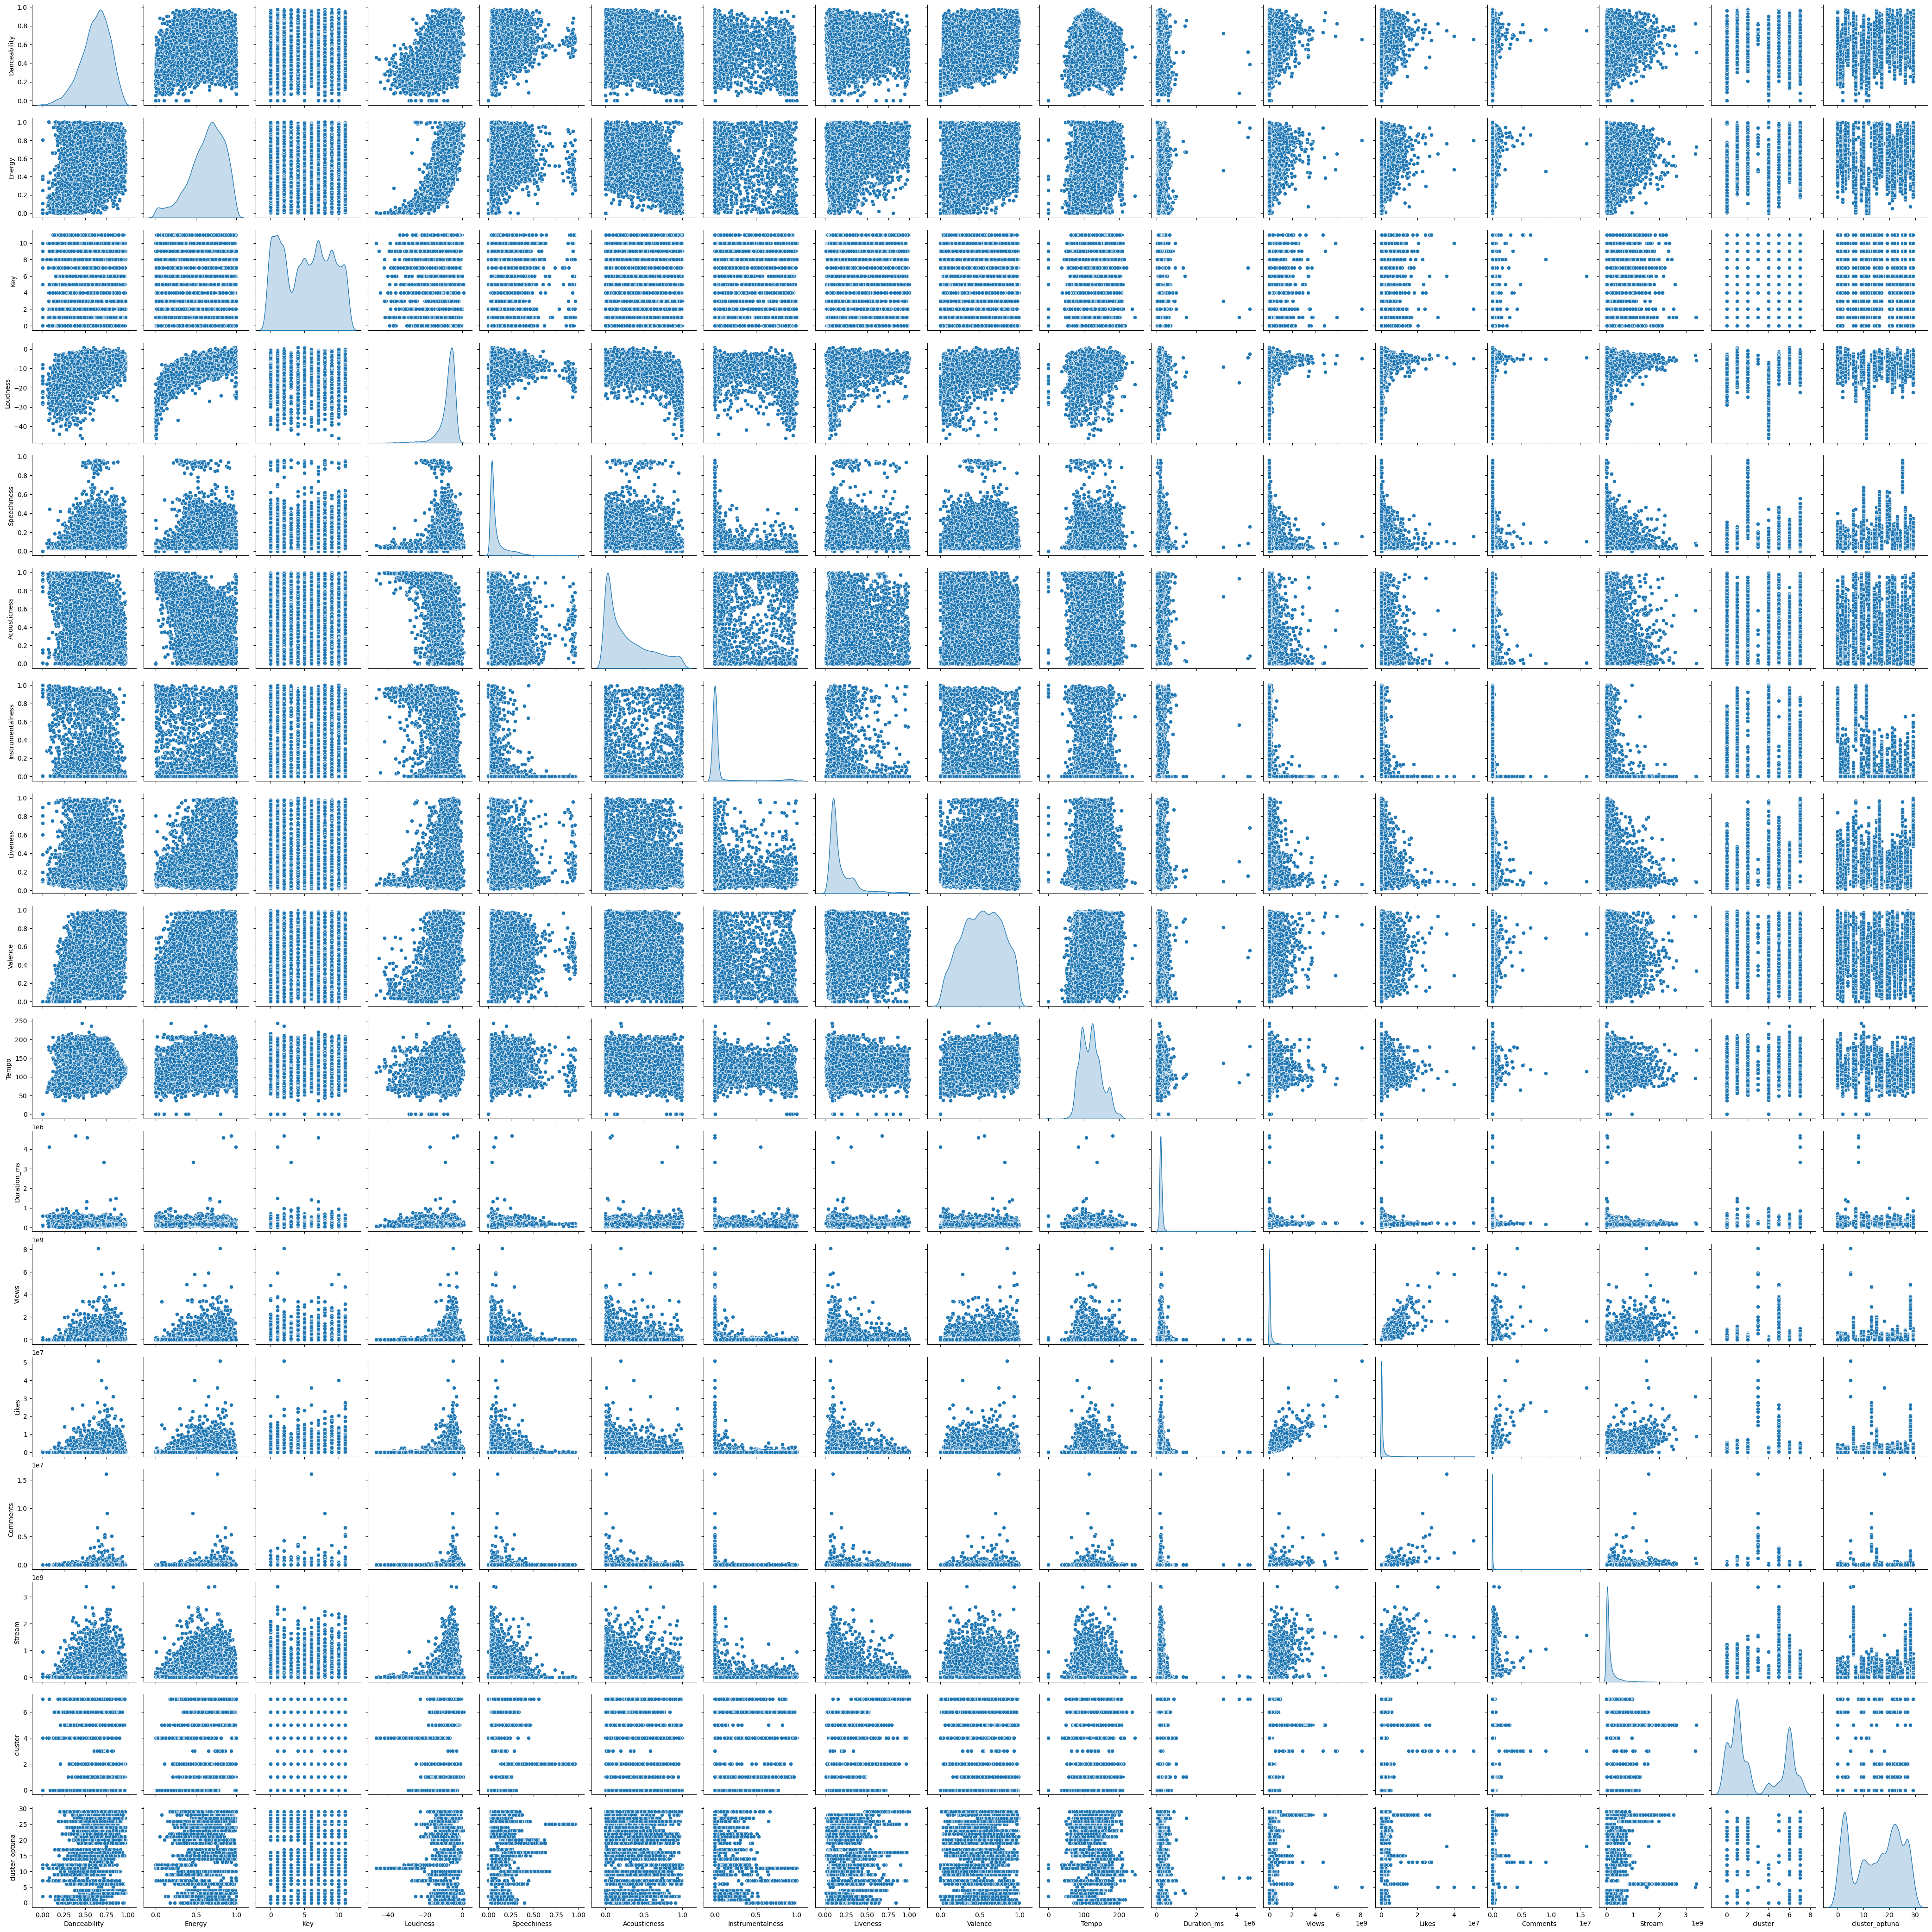

In [37]:
sns.pairplot(df, diag_kind='kde', markers='o')

## Modeling

### Test KMeans

In [36]:
import optuna
import mlflow
import mlflow.sklearn
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# 1) Configura MLflow
# (Si usas un servidor remoto, ajusta la URI; si no, por defecto usa ./mlruns)
mlflow.set_experiment("kmeans_optuna_clustering")
mlflow.sklearn.autolog()   # intercepta fit(), predict(), score(), loguea params, métricas y modelo

# 2) Carga y preprocesa tus datos
features = [
    'Danceability', 'Energy',
       'Key', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness',
       'Liveness', 'Valence', 'Tempo', 'Duration_ms', 'Views', 'Likes',
       'Comments', 'Stream'
]
X = df[features].values
X_scaled = StandardScaler().fit_transform(X)

# 3) Función objetivo con trials anidados en MLflow
def objective(trial):
    # Cada trial queda como corrida hija (nested) dentro del experimento
    with mlflow.start_run(nested=True):
        # Sugerencia de hiperparámetros
        n_clusters = trial.suggest_int("n_clusters", 30, 100)
        init_method = trial.suggest_categorical("init", ["k-means++", "random"])
        n_init = trial.suggest_int("n_init", 5, 30)
        max_iter = trial.suggest_int("max_iter", 100, 500)

        # Entrena KMeans
        km = KMeans(
            n_clusters=n_clusters,
            init=init_method,
            n_init=n_init,
            max_iter=max_iter,
            random_state=42
        )
        labels = km.fit_predict(X_scaled)

        # Calcula y loguea la métrica
        score = silhouette_score(X_scaled, labels)
        mlflow.log_metric("silhouette_score", score)

        return score

# 4) Crea y corre el estudio de Optuna
study = optuna.create_study(
    direction="maximize",
    sampler=optuna.samplers.TPESampler(seed=42)
)
study.optimize(
    objective,
    n_trials=50,
    timeout=300
)

# 5) Entrena y registra el modelo final con los mejores hiperparámetros
best_params = study.best_params
best_score  = study.best_value

print("Mejor silhouette:", best_score)
print("Mejores hiperparámetros:", best_params)

# Dentro de una nueva corrida, autolog() capturará el fit y el modelo resultante
with mlflow.start_run(run_name="best_model"):
    # Registra explícitamente la métrica y parámetros
    mlflow.log_param("n_clusters", best_params["n_clusters"])
    mlflow.log_param("init", best_params["init"])
    mlflow.log_param("n_init", best_params["n_init"])
    mlflow.log_param("max_iter", best_params["max_iter"])
    mlflow.log_metric("silhouette_score", best_score)

    # Ajusta el modelo final
    best_km = KMeans(**best_params, random_state=42)
    df['cluster_optuna'] = best_km.fit_predict(X_scaled)
    mlflow.sklearn.log_model(best_km, artifact_path="kmeans_model")

# 6) Visualiza los primeros resultados
print(df[['Artist','Track','cluster_optuna']].head())


[I 2025-07-17 19:46:39,040] A new study created in memory with name: no-name-86db6a45-cda8-46ac-ba42-39326867f65c
2025/07/17 19:46:45 WARNING mlflow.sklearn: Training metrics will not be recorded because training labels were not specified. To automatically record training metrics, provide training labels as inputs to the model training function.
2025/07/17 19:46:48 WARNING mlflow.utils.requirements_utils: Detected one or more mismatches between the model's dependencies and the current Python environment:
 - mlflow (current: 2.8.0, required: mlflow==2.19.0)
To fix the mismatches, call `mlflow.pyfunc.get_model_dependencies(model_uri)` to fetch the model's environment and install dependencies using the resulting environment file.
[I 2025-07-17 19:46:52,590] Trial 0 finished with value: 0.09682925603844296 and parameters: {'n_clusters': 56, 'init': 'k-means++', 'n_init': 20, 'max_iter': 162}. Best is trial 0 with value: 0.09682925603844296.
2025/07/17 19:46:53 WARNING mlflow.sklearn: Train

Mejor silhouette: 0.104195576788634
Mejores hiperparámetros: {'n_clusters': 30, 'init': 'k-means++', 'n_init': 12, 'max_iter': 108}


2025/07/17 19:51:47 WARNING mlflow.sklearn: Training metrics will not be recorded because training labels were not specified. To automatically record training metrics, provide training labels as inputs to the model training function.
2025/07/17 19:51:50 WARNING mlflow.utils.requirements_utils: Detected one or more mismatches between the model's dependencies and the current Python environment:
 - mlflow (current: 2.8.0, required: mlflow==2.19.0)
To fix the mismatches, call `mlflow.pyfunc.get_model_dependencies(model_uri)` to fetch the model's environment and install dependencies using the resulting environment file.
2025/07/17 19:51:52 WARNING mlflow.utils.requirements_utils: Detected one or more mismatches between the model's dependencies and the current Python environment:
 - mlflow (current: 2.8.0, required: mlflow==2.19.0)
To fix the mismatches, call `mlflow.pyfunc.get_model_dependencies(model_uri)` to fetch the model's environment and install dependencies using the resulting enviro

     Artist                                          Track  cluster_optuna
0  Gorillaz                                 Feel Good Inc.               6
1  Gorillaz                                Rhinestone Eyes               3
2  Gorillaz  New Gold (feat. Tame Impala and Bootie Brown)              27
3  Gorillaz                             On Melancholy Hill               0
4  Gorillaz                                 Clint Eastwood              15


### Test DBSCAN

In [108]:
import optuna
import mlflow
import mlflow.sklearn
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import numpy as np

# 1) Configura MLflow
mlflow.set_experiment("dbscan_optuna_clustering")
mlflow.sklearn.autolog(disable=True)  # DBSCAN no soporta predict()

# 2) Carga y preprocesa tus datos
features = [
    'Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness',
    'Acousticness', 'Instrumentalness', 'Liveness', 'Valence',
    'Tempo', 'Duration_ms', 'Views', 'Likes', 'Comments', 'Stream'
]

X = df[features].values
X_scaled = StandardScaler().fit_transform(X)

# 3) Función objetivo para Optuna
def objective(trial):
    with mlflow.start_run(nested=True):
        # Sugerencia de hiperparámetros
        eps = trial.suggest_float("eps", 0.1, 3.0, step=0.1)
        min_samples = trial.suggest_int("min_samples", 3, 20)

        # Entrena DBSCAN
        db = DBSCAN(eps=eps, min_samples=min_samples)
        labels = db.fit_predict(X_scaled)

        # Filtra puntos de ruido (-1) para calcular silhouette
        if len(set(labels)) <= 1 or (len(set(labels)) == 2 and -1 in labels):
            return -1.0  # no hay clusters útiles

        mask = labels != -1
        if len(set(labels[mask])) < 2:
            return -1.0

        score = silhouette_score(X_scaled[mask], labels[mask])
        mlflow.log_metric("silhouette_score", score)
        mlflow.log_param("eps", eps)
        mlflow.log_param("min_samples", min_samples)

        return score

# 4) Crear y correr el estudio
study = optuna.create_study(direction="maximize", sampler=optuna.samplers.TPESampler(seed=42))
study.optimize(objective, n_trials=50, timeout=300)

# 5) Entrena y registra el modelo final con mejores parámetros
best_params = study.best_params
best_score = study.best_value

print("Mejor silhouette:", best_score)
print("Mejores hiperparámetros:", best_params)

with mlflow.start_run(run_name="best_dbscan_model"):
    mlflow.log_params(best_params)
    mlflow.log_metric("silhouette_score", best_score)

    best_db = DBSCAN(**best_params)
    labels = best_db.fit_predict(X_scaled)
    df['cluster_dbscan'] = labels

    # Loguea manualmente el modelo ya que no tiene predict()
    mlflow.sklearn.log_model(best_db, artifact_path="dbscan_model")

# 6) Muestra los resultados
print(df[['Artist', 'Track', 'cluster_dbscan']].head())


[I 2025-07-24 22:10:20,275] A new study created in memory with name: no-name-d938c212-fb53-458c-b54d-94013e61eb73


[I 2025-07-24 22:10:30,589] Trial 0 finished with value: 0.02921299701001712 and parameters: {'eps': 1.2000000000000002, 'min_samples': 20}. Best is trial 0 with value: 0.02921299701001712.
[I 2025-07-24 22:10:49,255] Trial 1 finished with value: 0.4985965901778471 and parameters: {'eps': 2.2, 'min_samples': 13}. Best is trial 1 with value: 0.4985965901778471.
[I 2025-07-24 22:10:53,417] Trial 2 finished with value: 0.971186072483638 and parameters: {'eps': 0.5, 'min_samples': 5}. Best is trial 2 with value: 0.971186072483638.
[I 2025-07-24 22:10:55,339] Trial 3 finished with value: 0.9996909022096194 and parameters: {'eps': 0.2, 'min_samples': 18}. Best is trial 3 with value: 0.9996909022096194.
[I 2025-07-24 22:11:12,821] Trial 4 finished with value: 0.13354066568873915 and parameters: {'eps': 1.9000000000000001, 'min_samples': 15}. Best is trial 3 with value: 0.9996909022096194.
[I 2025-07-24 22:11:13,824] Trial 5 finished with value: -1.0 and parameters: {'eps': 0.1, 'min_samples':

Mejor silhouette: 0.9996909022096194
Mejores hiperparámetros: {'eps': 0.2, 'min_samples': 18}


2025/07/24 22:15:24 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
2025/07/24 22:15:27 WARNING mlflow.utils.requirements_utils: Detected one or more mismatches between the model's dependencies and the current Python environment:
 - mlflow (current: 2.8.0, required: mlflow==2.19.0)
To fix the mismatches, call `mlflow.pyfunc.get_model_dependencies(model_uri)` to fetch the model's environment and install dependencies using the resulting environment file.
2025/07/24 22:15:27 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


     Artist                                          Track  cluster_dbscan
0  Gorillaz                                 Feel Good Inc.              -1
1  Gorillaz                                Rhinestone Eyes              -1
2  Gorillaz  New Gold (feat. Tame Impala and Bootie Brown)              -1
3  Gorillaz                             On Melancholy Hill              -1
4  Gorillaz                                 Clint Eastwood              -1


In [109]:
import mlflow
logged_model = 'runs:/bd2e518ed24a448ab0b3e97372bee831/dbscan_model'

# Load model
loaded_model = mlflow.sklearn.load_model(logged_model)


In [110]:
loaded_model.fit_predict(X_scaled)

array([-1, -1, -1, ..., -1, -1, -1])

In [111]:
X_scaled[:1]

array([[ 1.19939775,  0.32571733,  0.19563243,  0.21427977,  0.71941692,
        -0.98911406, -0.27751365,  2.48909324,  0.98660252,  0.6058718 ,
        -0.01664893,  2.21328656,  3.15138613,  0.7509259 ,  3.75615803]])

In [112]:
# 3. Carga el mejor modelo desde MLflow
model_uri = 'runs:/bd2e518ed24a448ab0b3e97372bee831/dbscan_model' # <-- reemplaza <RUN_ID> por el verdadero ID de MLflow
model = mlflow.sklearn.load_model(model_uri)

# 4. Obtiene los labels del cluster (¡importante!)
labels = model.fit_predict(X_scaled)
df['cluster'] = labels

# 5. Función de recomendación
def recomendar_canciones(cancion_nombre, artista=None, top_n=10):
    # Encuentra la canción
    if artista:
        filtro = (df['Track'].str.lower() == cancion_nombre.lower()) & (df['Artist'].str.lower() == artista.lower())
    else:
        filtro = df['Track'].str.lower() == cancion_nombre.lower()

    if not filtro.any():
        print("Canción no encontrada.")
        return []

    idx = df[filtro].index[0]
    vector_objetivo = X_scaled[idx]
    cluster_objetivo = df.loc[idx, 'cluster']

    if cluster_objetivo == -1:
        print("La canción está en ruido (cluster -1). No se pueden recomendar similares.")
        return []

    # Filtra canciones del mismo cluster, excepto la misma
    mismas = df[(df['cluster'] == cluster_objetivo) & (df.index != idx)]

    if mismas.empty:
        print("No hay otras canciones en el mismo cluster.")
        return []

    # Calcula similitud coseno
    similitudes = cosine_similarity(
        [vector_objetivo], X_scaled[mismas.index]
    )[0]

    top_indices = np.argsort(similitudes)[::-1][:top_n]
    recomendaciones = mismas.iloc[top_indices][['Artist', 'Track']]
    recomendaciones['similaridad'] = similitudes[top_indices]

    return recomendaciones.reset_index(drop=True)



In [113]:
# 6. Usa la función
recs = recomendar_canciones("Spotlight", artista="Lil Peep")
print(recs)

La canción está en ruido (cluster -1). No se pueden recomendar similares.
[]


________________________________

### Test Cosine Similarity

In [ ]:
# import mlflow
# import mlflow.sklearn
# import pandas as pd
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics.pairwise import cosine_similarity

# # 1) Configura MLflow
# mlflow.set_experiment("content_based_recommendation")
# mlflow.sklearn.autolog()



# # 3) Preprocesa las características
# features = [
#     'Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness',
#     'Acousticness', 'Instrumentalness', 'Liveness', 'Valence',
#     'Tempo', 'Duration_ms', 'Views', 'Likes', 'Comments', 'Stream'
# ]
# X = df[features]
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# # 4) Construye perfiles de items
# item_profiles = pd.DataFrame(X_scaled, index=df[['Track','Artist','Album']], columns=features)

# # 5) Función para construir el perfil de un usuario
# def build_user_profile(liked_tracks):
#     # Filtra solo las pistas válidas en el índice
#     valid_tracks = [t for t in liked_tracks if t in item_profiles.index]
#     if not valid_tracks:
#         raise ValueError("Ninguna de las pistas proporcionadas se encuentra en el dataset.")
#     liked_profiles = item_profiles.loc[valid_tracks]
#     user_profile = liked_profiles.mean(axis=0)
#     return user_profile

# # 6) Función de recomendación
# def recommend(user_profile, item_profiles, top_n=10, exclude_list=None):
#     # Calcula similitudes coseno
#     sims = cosine_similarity([user_profile], item_profiles.values)[0]
#     sim_series = pd.Series(sims, index=item_profiles.index)
#     # Excluye pistas ya vistas o "liked"
#     if exclude_list:
#         sim_series = sim_series.drop(labels=[t for t in exclude_list if t in sim_series.index], errors='ignore')
#     recommendations = sim_series.nlargest(top_n)
#     return recommendations

# # 7) Ejemplo de uso
# def main():
#     # Define aquí las pistas que el usuario ha marcado como "gusta"
#     user_likes = ['Everybody Dies In Their Nightmares', 'Falling Down - Bonus Track', 'Revenge']  # Reemplaza con tus pistas reales
#     try:
#         user_profile = build_user_profile(user_likes)
#     except ValueError as e:
#         print(f"Error al generar perfil de usuario: {e}")
#         return
#     recs = recommend(user_profile, item_profiles, top_n=10, exclude_list=user_likes)

#     # 8) Loguea en MLflow
#     with mlflow.start_run(run_name="recommendations"):
#         mlflow.log_param("n_recommendations", len(recs))
#         mlflow.log_metric("mean_similarity", recs.mean())
#         # Guarda recomendaciones como CSV para trazabilidad
#         recs.to_csv("recommendaciones.csv", header=['similarity'])
#         mlflow.log_artifact("recommendaciones.csv")

#     print("Top 10 recomendaciones basadas en contenido:")
#     print(recs)

# if __name__ == "__main__":
#     main()


Error al generar perfil de usuario: Ninguna de las pistas proporcionadas se encuentra en el dataset.


### Cosine Similarity

In [91]:
import mlflow
import mlflow.sklearn
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity

# 1) Configura MLflow
mlflow.set_experiment("content_based_recommendation")
mlflow.sklearn.autolog()

# 2) Dataset: asegúrate de que 'df' esté definido con las columnas requeridas
# Por ejemplo:
# df = pd.read_csv('your_dataset.csv')

# 3) Preprocesamiento de características numéricas
features = [
    'Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness',
    'Acousticness', 'Instrumentalness', 'Liveness', 'Valence',
    'Tempo', 'Duration_ms', 'Views', 'Likes', 'Comments', 'Stream'
]
X = df[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4) Construcción de los perfiles de items
item_profiles = pd.DataFrame(
    X_scaled,
    index=pd.MultiIndex.from_frame(df[['Track', 'Artist', 'Album']]),
    columns=features
)

# 5) Construcción del perfil del usuario a partir de tuplas completas
def build_user_profile(liked_tracks):
    """
    liked_tracks: lista de tuplas (Track, Artist, Album)
    """
    valid_tracks = [t for t in liked_tracks if t in item_profiles.index]
    if not valid_tracks:
        raise ValueError("Ninguna de las pistas proporcionadas se encuentra en el dataset.")
    
    liked_profiles = item_profiles.loc[valid_tracks]
    user_profile = liked_profiles.mean(axis=0)
    return user_profile

# 6) Función de recomendación basada en similitud coseno
def recommend(user_profile, item_profiles, top_n=10, exclude_list=None):
    """
    exclude_list: lista de tuplas (Track, Artist, Album) a excluir
    """
    sims = cosine_similarity([user_profile], item_profiles.values)[0]
    sim_series = pd.Series(sims, index=item_profiles.index)

    if exclude_list:
        sim_series = sim_series.drop(labels=[t for t in exclude_list if t in sim_series.index], errors='ignore')

    recommendations = sim_series.nlargest(top_n).reset_index()
    recommendations.columns = ['Track', 'Artist', 'Album', 'Similarity']
    return recommendations

# 7) Ejecución principal
def main():
    # El usuario debe especificar exactamente track, artist y album
    # user_likes = [
    #     ('Revenge', 'XXXTENTACION', '?'),
    #     ('Falling Down - Bonus Track', 'XXXTENTACION', 'SKINS'),
    #     ('Everybody Dies In Their Nightmares', 'XXXTENTACION', '17')
    # ]
    user_likes = [
        ('Spotlight', 'Lil Peep', 'Spotlight')
        # ('Falling Down - Bonus Track', 'XXXTENTACION', 'SKINS'),
        # ('Everybody Dies In Their Nightmares', 'XXXTENTACION', '17')
    ]


    try:
        user_profile = build_user_profile(user_likes)
    except ValueError as e:
        print(f"Error al generar perfil de usuario: {e}")
        return

    recs = recommend(user_profile, item_profiles, top_n=10, exclude_list=user_likes)

    # 8) Log en MLflow
    with mlflow.start_run(run_name="recommendations"):
        mlflow.log_param("n_recommendations", len(recs))
        mlflow.log_metric("mean_similarity", recs['Similarity'].mean())
        recs.to_csv("recomendaciones.csv", index=False)
        mlflow.log_artifact("recomendaciones.csv")

    print("Top 10 recomendaciones basadas en contenido:")
    print(recs)

if __name__ == "__main__":
    main()


Top 10 recomendaciones basadas en contenido:
                                               Track           Artist  \
0                                           Papercut      Linkin Park   
1                                            Holiday        Green Day   
2                Purple Lamborghini (with Rick Ross)         Skrillex   
3                Purple Lamborghini (with Rick Ross)        Rick Ross   
4                     All The Way Up (feat. Infared)   French Montana   
5                     All The Way Up (feat. Infared)          Fat Joe   
6                                           Fly Away    Lenny Kravitz   
7  My Songs Know What You Did In The Dark (Light ...     Fall Out Boy   
8           Nada Fue Un Error - Live In Spain / 2005  Julieta Venegas   
9                                         Don't Look      Karan Aujla   

                                 Album  Similarity  
0        Hybrid Theory (Bonus Edition)    0.951183  
1   Greatest Hits: God's Favorite Band    0.9

In [76]:
top_songs[['Artist', 'Track', 'Energy', 'Danceability', 'Acousticness']]

Artist                                          Track  \
15250        The Weeknd                                Blinding Lights   
12452        Ed Sheeran                                   Shape of You   
19186     Lewis Capaldi                              Someone You Loved   
17937       Post Malone                     rockstar (feat. 21 Savage)   
17445          Swae Lee  Sunflower - Spider-Man: Into the Spider-Verse   
17938       Post Malone  Sunflower - Spider-Man: Into the Spider-Verse   
13503             Drake                                      One Dance   
16028            Halsey                                         Closer   
16099  The Chainsmokers                                         Closer   
14030   Imagine Dragons                                       Believer   

       Energy  Danceability  Acousticness  
15250   0.730         0.514       0.00146  
12452   0.652         0.825       0.58100  
19186   0.405         0.501       0.75100  
17937   0.520         0.585       0.12400  
17445   0.522         0.755       0.53300  
17938   0.522         0.755       0.53300  
13503   0.625         0.792       0.00776  
16028   0.524         0.748       0.41400  
16099   0.524         0.748       0.41400  
14030   0.780         0.776       0.06220

In [ ]:
df[(df['Artist']== 'Lil Peep')& (df['Album']== 'Lil Peep') & (df['Track']== 'Lil Peep')].head(10)

In [107]:
df[(df['Track']== 'Falling Down - Bonus Track')]

Artist                       Track  \
17223  XXXTENTACION  Falling Down - Bonus Track   
17276      Lil Peep  Falling Down - Bonus Track   

                                    Album Album_type  Danceability  Energy  \
17223  Come Over When You're Sober, Pt. 2      album         0.669   0.574   
17276  Come Over When You're Sober, Pt. 2      album         0.669   0.574   

       Key  Loudness  Speechiness  Acousticness  ...  Liveness  Valence  \
17223  4.0    -6.442       0.0286        0.0175  ...     0.146    0.273   
17276  4.0    -6.442       0.0286        0.0175  ...     0.146    0.273   

         Tempo  Duration_ms      Views    Likes  Comments       Stream  \
17223  120.013     196400.0  3525957.0  60566.0    3375.0  939517723.0   
17276  120.013     196400.0  3525957.0  60566.0    3375.0  939517723.0   

       cluster_dbscan  cluster  
17223              -1       -1  
17276              -1       -1  

[2 rows x 21 columns]

In [87]:
# df[df['Artist']== 'XXXTENTACION'].head(10)
df[df['Artist']== 'Lil Peep'].head(10)

Artist                       Track  \
17275  Lil Peep               Star Shopping   
17276  Lil Peep  Falling Down - Bonus Track   
17277  Lil Peep                        nuts   
17278  Lil Peep                   white tee   
17279  Lil Peep              Save That Shit   
17280  Lil Peep                  beamer boy   
17281  Lil Peep         your favorite dress   
17282  Lil Peep                 witchblades   
17283  Lil Peep                   Spotlight   
17284  Lil Peep           Life is Beautiful   

                                    Album Album_type  Danceability  Energy  \
17275                       Star Shopping     single         0.538   0.471   
17276  Come Over When You're Sober, Pt. 2      album         0.669   0.574   
17277                        LIVE FOREVER      album         0.510   0.739   
17278                             crybaby      album         0.800   0.526   
17279  Come Over When You're Sober, Pt. 1      album         0.534   0.583   
17280                          beamer boy     single         0.743   0.731   
17281                          CASTLES II     single         0.494   0.628   
17282                          CASTLES II     single         0.634   0.540   
17283                           Spotlight     single         0.546   0.822   
17284  Come Over When You're Sober, Pt. 2      album         0.533   0.638   

        Key  Loudness  Speechiness  Acousticness  Instrumentalness  Liveness  \
17275   4.0    -9.840       0.0955       0.09460          0.018500    0.1160   
17276   4.0    -6.442       0.0286       0.01750          0.002940    0.1460   
17277   2.0    -7.410       0.0415       0.00872          0.000000    0.1110   
17278  11.0    -8.909       0.0416       0.28500          0.000000    0.0717   
17279   2.0    -8.672       0.0288       0.02620          0.000000    0.4210   
17280   8.0    -4.511       0.1030       0.04920          0.000019    0.2260   
17281   7.0    -7.615       0.0541       0.08140          0.000000    0.1110   
17282   8.0    -7.002       0.0777       0.02230          0.000000    0.3020   
17283   7.0    -4.483       0.1510       0.01450          0.000000    0.7420   
17284  10.0    -9.411       0.0636       0.03850          0.000932    0.0758   

       Valence    Tempo  Duration_ms        Views      Likes  Comments  \
17275    0.307   93.070     142000.0      86499.0     3856.0     203.0   
17276    0.273  120.013     196400.0    3525957.0    60566.0    3375.0   
17277    0.148   62.007      85360.0    6025328.0   188085.0    7542.0   
17278    0.729  149.991     132227.0   51365389.0   614165.0   21443.0   
17279    0.145  106.000     231547.0  453426650.0  4470353.0  183102.0   
17280    0.337  123.989     203373.0   31914381.0   406845.0   12470.0   
17281    0.101  129.966     177387.0   52760072.0   736122.0   14784.0   
17282    0.543  143.968     149360.0  253513571.0  2543685.0   87782.0   
17283    0.615  150.060     177600.0  188443416.0  2258542.0   78412.0   
17284    0.324  135.056     207587.0  105560584.0  1521957.0   66963.0   

            Stream  
17275  798993758.0  
17276  939517723.0  
17277  126878654.0  
17278  237332013.0  
17279  632052458.0  
17280  393464052.0  
17281   91524200.0  
17282  259222528.0  
17283  350928352.0  
17284  255329532.0

In [81]:
df[['Track','Artist','Album']]

Track       Artist  \
0                                     Feel Good Inc.     Gorillaz   
1                                    Rhinestone Eyes     Gorillaz   
2      New Gold (feat. Tame Impala and Bootie Brown)     Gorillaz   
3                                 On Melancholy Hill     Gorillaz   
4                                     Clint Eastwood     Gorillaz   
...                                              ...          ...   
20713                           JUST DANCE HARDSTYLE  SICK LEGEND   
20714                 SET FIRE TO THE RAIN HARDSTYLE  SICK LEGEND   
20715                      OUTSIDE HARDSTYLE SPED UP  SICK LEGEND   
20716                            ONLY GIRL HARDSTYLE  SICK LEGEND   
20717                             MISS YOU HARDSTYLE  SICK LEGEND   

                                               Album  
0                                         Demon Days  
1                                      Plastic Beach  
2      New Gold (feat. Tame Impala and Bootie Brown)  
3                                      Plastic Beach  
4                                           Gorillaz  
...                                              ...  
20713                           JUST DANCE HARDSTYLE  
20714                 SET FIRE TO THE RAIN HARDSTYLE  
20715                      OUTSIDE HARDSTYLE SPED UP  
20716                            ONLY GIRL HARDSTYLE  
20717                             MISS YOU HARDSTYLE  

[20716 rows x 3 columns]

In [79]:
df['Track']

0                                       Feel Good Inc.
1                                      Rhinestone Eyes
2        New Gold (feat. Tame Impala and Bootie Brown)
3                                   On Melancholy Hill
4                                       Clint Eastwood
                             ...                      
20713                             JUST DANCE HARDSTYLE
20714                   SET FIRE TO THE RAIN HARDSTYLE
20715                        OUTSIDE HARDSTYLE SPED UP
20716                              ONLY GIRL HARDSTYLE
20717                               MISS YOU HARDSTYLE
Name: Track, Length: 20716, dtype: object

In [83]:
item_profiles

Danceability    Energy  \
(Feel Good Inc., Gorillaz, Demon Days)                  1.199398  0.325717   
(Rhinestone Eyes, Gorillaz, Plastic Beach)              0.340189  0.316378   
(New Gold (feat. Tame Impala and Bootie Brown),...      0.455154  1.343735   
(On Melancholy Hill, Gorillaz, Plastic Beach)           0.418849  0.484491   
(Clint Eastwood, Gorillaz, Gorillaz)                    0.261529  0.274349   
...                                                          ...       ...   
(JUST DANCE HARDSTYLE, SICK LEGEND, JUST DANCE ...     -0.228582  1.357744   
(SET FIRE TO THE RAIN HARDSTYLE, SICK LEGEND, S...     -0.537171  1.404443   
(OUTSIDE HARDSTYLE SPED UP, SICK LEGEND, OUTSID...     -1.069639  0.909443   
(ONLY GIRL HARDSTYLE, SICK LEGEND, ONLY GIRL HA...     -1.226958  0.615245   
(MISS YOU HARDSTYLE, SICK LEGEND, MISS YOU HARD...     -0.736847  1.413782   

                                                         Key  Loudness  \
(Feel Good Inc., Gorillaz, Demon Days)              0.195632  0.214280   
(Rhinestone Eyes, Gorillaz, Plastic Beach)          0.754860  0.400783   
(New Gold (feat. Tame Impala and Bootie Brown),... -1.202436  0.807678   
(On Melancholy Hill, Gorillaz, Plastic Beach)      -0.922823  0.401862   
(Clint Eastwood, Gorillaz, Gorillaz)                1.314087 -0.206215   
...                                                      ...       ...   
(JUST DANCE HARDSTYLE, SICK LEGEND, JUST DANCE ... -0.083981  0.286593   
(SET FIRE TO THE RAIN HARDSTYLE, SICK LEGEND, S... -0.363595  1.270482   
(OUTSIDE HARDSTYLE SPED UP, SICK LEGEND, OUTSID... -0.363595  0.645999   
(ONLY GIRL HARDSTYLE, SICK LEGEND, ONLY GIRL HA...  1.034474  0.791705   
(MISS YOU HARDSTYLE, SICK LEGEND, MISS YOU HARD...  0.195632  0.675356   

                                                    Speechiness  Acousticness  \
(Feel Good Inc., Gorillaz, Demon Days)                 0.719417     -0.989114   
(Rhinestone Eyes, Gorillaz, Plastic Beach)            -0.591797     -0.714779   
(New Gold (feat. Tame Impala and Bootie Brown),...    -0.395294     -0.869865   
(On Melancholy Hill, Gorillaz, Plastic Beach)         -0.629311     -1.018262   
(Clint Eastwood, Gorillaz, Gorillaz)                   0.665825     -0.929944   
...                                                         ...           ...   
(JUST DANCE HARDSTYLE, SICK LEGEND, JUST DANCE ...    -0.568574      0.546521   
(SET FIRE TO THE RAIN HARDSTYLE, SICK LEGEND, S...     0.362138     -0.920513   
(OUTSIDE HARDSTYLE SPED UP, SICK LEGEND, OUTSID...    -0.283644     -0.933437   
(ONLY GIRL HARDSTYLE, SICK LEGEND, ONLY GIRL HA...     2.880955      0.225171   
(MISS YOU HARDSTYLE, SICK LEGEND, MISS YOU HARD...     0.094179     -1.008640   

                                                    Instrumentalness  \
(Feel Good Inc., Gorillaz, Demon Days)                     -0.277514   
(Rhinestone Eyes, Gorillaz, Plastic Beach)                 -0.286015   
(New Gold (feat. Tame Impala and Bootie Brown),...         -0.046889   
(On Melancholy Hill, Gorillaz, Plastic Beach)               2.344223   
(Clint Eastwood, Gorillaz, Gorillaz)                       -0.289570   
...                                                              ...   
(JUST DANCE HARDSTYLE, SICK LEGEND, JUST DANCE ...         -0.289570   
(SET FIRE TO THE RAIN HARDSTYLE, SICK LEGEND, S...         -0.289570   
(OUTSIDE HARDSTYLE SPED UP, SICK LEGEND, OUTSID...         -0.289570   
(ONLY GIRL HARDSTYLE, SICK LEGEND, ONLY GIRL HA...         -0.194360   
(MISS YOU HARDSTYLE, SICK LEGEND, MISS YOU HARD...          4.424351   

                                                    Liveness   Valence  \
(Feel Good Inc., Gorillaz, Demon Days)              2.489093  0.986603   
(Rhinestone Eyes, Gorillaz, Plastic Beach)         -0.873576  1.312555   
(New Gold (feat. Tame Impala and Bootie Brown),... -0.459992  0.086160   
(On Melancholy Hill, Gorillaz, Plastic Beach)      -0.768548  0.196169   
(Clint Eastwood, G

------------------------------------